# UB Philantropy- Donor categorization and donation amount prediction

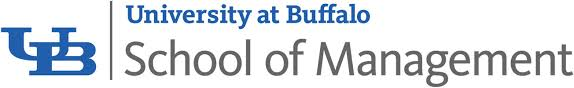

In [1]:
from IPython.display import Image
Image(filename="F:/UB Philantrophy/logo.jpg", width=800, height=100)

## About the Philantropy team

At the University at Buffalo, the philantropy team is building a culture of lifelong alumni and donor engagement around the world and aggressively advocating for greater involvement and support among UB’s students, faculty and staff members, alumni and friends.


## Problem statement


Q1. Donor Retention: Among first time donors, who is likely to give again? (Predict donors most likely to renew.) 

Q2. Donor Acquisition: What behaviors lead to a prospect becoming a first time donor?

Q3. Donor upgrade: Likely amount of next gift.


## Donor Categorization 

#### Non-donors
Have not donated in past  5 years
#### Lapsed
Lapsed for atleast one year  – did not donate in 2017, but donated in either 2016, 2015, 2014, 2013
#### Loyal donor
Donated in 2017 and any of the last 4 years
#### First-time donors
Donating for the first time in 2017


#### Libraries Used: Pandas,numpy,seaborn,matplotlib,scipy,sklearn,graphviz

#### Machine Learning Models

Decision Tree Classifier - To Categorize the donors

Linear Regression and Random forest Regressor -To predict the amount of donation 


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.display import Image


### Loading Data
Let's first load the required libraries and Philantropy Dataset using pandas' read CSV function 

In [3]:
ub_philantropy = pd.read_csv(r"F:\UB Philantrophy\Management_zipcode_1_use.csv")

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ub_philantropy.shape

(34338, 52)

### Overview of the Datsaet

In [5]:
ub_philantropy.head(5)

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,...,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,...,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,...,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,...,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,...,0,0,0,0,0,0,0,0,0,0


Lets take a look at the variables available

In [6]:
ub_philantropy.columns

Index(['ID_NUMBER', 'FACULTY_STAFF_IND', 'MARITAL_STATUS', 'GENDER',
       'AGE_BRACKET', 'STATE_CODE', 'ZIPCODE', 'STUDENT_ACTIVITY_PARTICIPANT',
       'DEGREE_CODE1', 'DEGREE_YEAR1', 'SCHOOL1', 'DEGREE_CODE2',
       'DEGREE_YEAR2', 'SCHOOL2', 'DEGREE_CODE3', 'DEGREE_YEAR3', 'SCHOOL3',
       'DEGREE_CODE4', 'DEGREE_YEAR4', 'SCHOOL4', 'DONOR_CATEGORY',
       'LIFETIME_RECOGNITION_AMT', 'NO_YRS_GIVING', 'GIFT_AMOUNT_2018_NEW',
       'GIFT_AMOUNT_2017_NEW', 'GIFT_AMOUNT_2016_NEW', 'GIFT_AMOUNT_2015_NEW',
       'GIFT_AMOUNT_2014_NEW', 'GIFT_AMOUNT_2013_NEW', 'GIFT_AMOUNT_2012_NEW',
       'GIFT_AMOUNT_2011_NEW', 'GIFT_AMOUNT_2010_NEW', 'GIFT_AMOUNT_2009_NEW',
       'GIFT_AMOUNT_2008_NEW', 'LAST_GIFT_DATE', 'FIRST_GIFT_DATE',
       'FIRST_GIFT_AMOUNT', 'GIVING_SCHOOL_UNIT1', 'GIVING_SCHOOL_UNIT2',
       'GIVING_SCHOOL_UNIT3', 'ENGAGEMENT_SCORE', 'NO_EVENTS_2018_NEW',
       'NO_EVENTS_2017_NEW', 'NO_EVENTS_2016_NEW', 'NO_EVENTS_2015_NEW',
       'NO_EVENTS_2014_NEW', 'NO_EVENTS_2

### Exploratory Data Analysis
#### Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods

### Visualizing the Categories

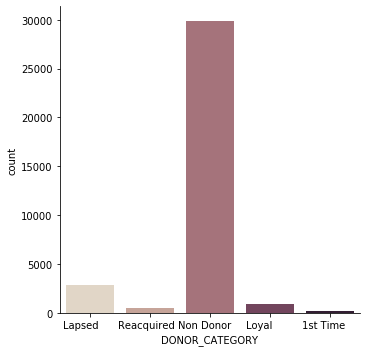

In [7]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=ub_philantropy)

###  Data Cleaning : Lets check for the missing values

In [8]:
ub_philantropy.isnull().sum()

ID_NUMBER                           0
FACULTY_STAFF_IND                   0
MARITAL_STATUS                      0
GENDER                              0
AGE_BRACKET                         0
STATE_CODE                        291
ZIPCODE                           292
STUDENT_ACTIVITY_PARTICIPANT        0
DEGREE_CODE1                        0
DEGREE_YEAR1                        0
SCHOOL1                             0
DEGREE_CODE2                        0
DEGREE_YEAR2                        0
SCHOOL2                         28807
DEGREE_CODE3                        0
DEGREE_YEAR3                        0
SCHOOL3                         33772
DEGREE_CODE4                        0
DEGREE_YEAR4                        0
SCHOOL4                         34300
DONOR_CATEGORY                      0
LIFETIME_RECOGNITION_AMT        23303
NO_YRS_GIVING                   23083
GIFT_AMOUNT_2018_NEW                0
GIFT_AMOUNT_2017_NEW                0
GIFT_AMOUNT_2016_NEW                0
GIFT_AMOUNT_

### Now let us drop the columns which has more than 500 missing values

In [9]:
cols = ub_philantropy.columns.tolist()
drop_cols = []
for col in cols:
    if ub_philantropy[col].isnull().sum() > 500:
        drop_cols.append(col)
        
ub_philantropy.drop(columns=drop_cols, inplace=True)

In [10]:
ub_philantropy.shape

(34338, 41)

### Finding the total number of numerical columns

In [11]:
print('Total numerical vlaued columns: ', len(ub_philantropy.select_dtypes(include=np.number).columns), '\n')
for col in ub_philantropy.select_dtypes(include=np.number).columns:
    print(col)

Total numerical vlaued columns:  26 

ID_NUMBER
AGE_BRACKET
DEGREE_YEAR1
GIFT_AMOUNT_2018_NEW
GIFT_AMOUNT_2017_NEW
GIFT_AMOUNT_2016_NEW
GIFT_AMOUNT_2015_NEW
GIFT_AMOUNT_2014_NEW
GIFT_AMOUNT_2013_NEW
GIFT_AMOUNT_2012_NEW
GIFT_AMOUNT_2011_NEW
GIFT_AMOUNT_2010_NEW
GIFT_AMOUNT_2009_NEW
GIFT_AMOUNT_2008_NEW
ENGAGEMENT_SCORE
NO_EVENTS_2018_NEW
NO_EVENTS_2017_NEW
NO_EVENTS_2016_NEW
NO_EVENTS_2015_NEW
NO_EVENTS_2014_NEW
NO_EVENTS_2013_NEW
NO_EVENTS_2012_NEW
NO_EVENTS_2011_NEW
NO_EVENTS_2010_NEW
NO_EVENTS_2009_NEW
NO_EVENTS_2008_NEW


### Calculating the total number of Categorical columns or features

In [12]:
print('Total categorical valued columns: ', len(ub_philantropy.select_dtypes(include=np.object).columns), '\n')
for col in ub_philantropy.select_dtypes(include=np.object).columns:
    print(col)

Total categorical valued columns:  15 

FACULTY_STAFF_IND
MARITAL_STATUS
GENDER
STATE_CODE
ZIPCODE
STUDENT_ACTIVITY_PARTICIPANT
DEGREE_CODE1
SCHOOL1
DEGREE_CODE2
DEGREE_YEAR2
DEGREE_CODE3
DEGREE_YEAR3
DEGREE_CODE4
DEGREE_YEAR4
DONOR_CATEGORY


## Predicting the donation amount using regression

### Correlation Coeffecients:
The correlation coefficient is a statistical measure that calculates the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. ... A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation

The donation amount in 2018 is taken as the target variable to build a regression model to predict the donation amount

In [13]:
#Correlation between GIFT_AMOUNT_2018_NEW and other numerical values
ub_philantropy.corr()['GIFT_AMOUNT_2018_NEW'].sort_values(ascending=False)

GIFT_AMOUNT_2018_NEW    1.000000
GIFT_AMOUNT_2015_NEW    0.326208
GIFT_AMOUNT_2014_NEW    0.273330
GIFT_AMOUNT_2012_NEW    0.233355
GIFT_AMOUNT_2013_NEW    0.220807
GIFT_AMOUNT_2010_NEW    0.214064
GIFT_AMOUNT_2016_NEW    0.199159
GIFT_AMOUNT_2009_NEW    0.182934
GIFT_AMOUNT_2017_NEW    0.168465
ENGAGEMENT_SCORE        0.153428
NO_EVENTS_2014_NEW      0.098489
NO_EVENTS_2018_NEW      0.098176
GIFT_AMOUNT_2011_NEW    0.093104
NO_EVENTS_2017_NEW      0.090915
NO_EVENTS_2013_NEW      0.089592
NO_EVENTS_2015_NEW      0.080415
NO_EVENTS_2016_NEW      0.072375
NO_EVENTS_2009_NEW      0.069504
NO_EVENTS_2011_NEW      0.061458
NO_EVENTS_2012_NEW      0.059055
NO_EVENTS_2010_NEW      0.058058
NO_EVENTS_2008_NEW      0.053499
AGE_BRACKET             0.020469
GIFT_AMOUNT_2008_NEW    0.012120
DEGREE_YEAR1           -0.025627
ID_NUMBER              -0.026878
Name: GIFT_AMOUNT_2018_NEW, dtype: float64

In [14]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 10,6

### Relation between target variable and highest correlated feature

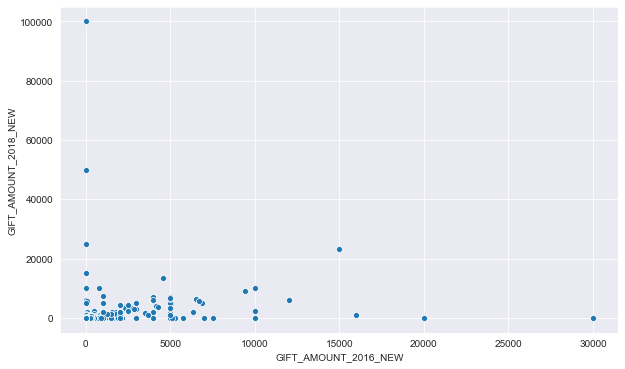

In [15]:
sns.scatterplot(data=ub_philantropy,
           x=ub_philantropy['GIFT_AMOUNT_2016_NEW'],
           y=ub_philantropy['GIFT_AMOUNT_2018_NEW']
          )

plt.show()

### A histogram to check the skewness of the target variable

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


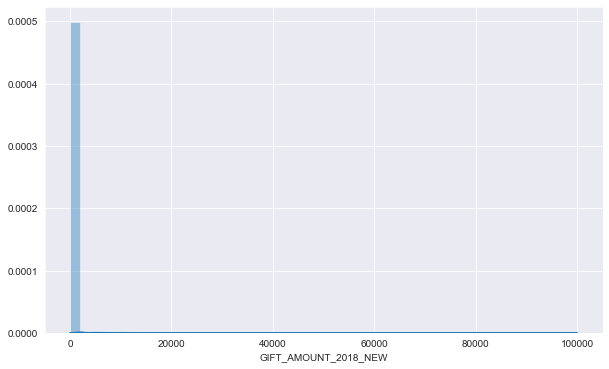

In [16]:
sns.distplot(ub_philantropy['GIFT_AMOUNT_2018_NEW'])
plt.show()

## Regression Models

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Excluding the categorical columns for regression

In [18]:
cat_cols = ub_philantropy.select_dtypes(include=np.object).columns.tolist()

num_cols = ub_philantropy.select_dtypes(include=np.number).columns.tolist()

In [19]:
df = ub_philantropy.copy(deep=True)
df = df[num_cols]
X = df.drop(columns=['GIFT_AMOUNT_2018_NEW'])
y = df['GIFT_AMOUNT_2018_NEW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Saving id number for future use
train_id_number = X_train['ID_NUMBER']
test_id_number = X_test['ID_NUMBER']
X_train.drop(columns=['ID_NUMBER'], inplace=True)
X_test.drop(columns=['ID_NUMBER'], inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Function to determine the count of observations in each range (Mean absolute Error)

In [21]:
def checkMAE(actual, pred, n):
    count = 0
    for i in range(len(actual)):
        if abs(actual[i] - pred[i]) > n:
            count +=1
    
    return count

mae_values = [10, 25, 50, 75, 100]

In [22]:
lr_train_pred = lr.predict(X_train)
print('\t\t\t\tLinear Regression with only numerical features\n')
print('Training data accuracy')
print('Length of Training Data: ', len(X_train))
print('MSE: ', mean_squared_error(y_train, lr_train_pred))
print('MAE: ', mean_absolute_error(y_train, lr_train_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_train.values.tolist(), lr_train_pred.tolist(), i),
     '(', '%.2f'%(checkMAE(y_train.values.tolist(), lr_train_pred.tolist(), i) / len(y_train) * 100), '%)')
#print('r^2: ', r2_score(y_train, lr_train_pred))
print('\n')
lr_test_pred = lr.predict(X_test)
print('Testing data accuracy')
print('Length of Testing Data: ', len(X_test))
print('MSE: ', mean_squared_error(y_test, lr_test_pred))
print('MAE: ', mean_absolute_error(y_test, lr_test_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_test.values.tolist(), lr_test_pred.tolist(), i),
     '(', '%.2f'%(checkMAE(y_test.values.tolist(), lr_test_pred.tolist(), i) / len(y_test) * 100), '%)')

#print('r^2: ', r2_score(y_test, lr_test_pred))

				Linear Regression with only numerical features

Training data accuracy
Length of Training Data:  27470
MSE:  490712.56336312357
MAE:  51.93811799998937
Number of predicted values with >  10  AE:  18695 ( 68.06 %)
Number of predicted values with >  25  AE:  8982 ( 32.70 %)
Number of predicted values with >  50  AE:  4645 ( 16.91 %)
Number of predicted values with >  75  AE:  3491 ( 12.71 %)
Number of predicted values with >  100  AE:  2606 ( 9.49 %)


Testing data accuracy
Length of Testing Data:  6868
MSE:  132852.56207421984
MAE:  55.73007050896226
Number of predicted values with >  10  AE:  4675 ( 68.07 %)
Number of predicted values with >  25  AE:  2197 ( 31.99 %)
Number of predicted values with >  50  AE:  1160 ( 16.89 %)
Number of predicted values with >  75  AE:  873 ( 12.71 %)
Number of predicted values with >  100  AE:  641 ( 9.33 %)


### Random Forest Regressor

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
rf_train_pred = rf.predict(X_train)
print('\t\t\t\tRandom Forest Regressor with only numerical features\n')
print('Training data accuracy')
print('Length of Training Data: ', len(X_train))
print('MSE: ', mean_squared_error(y_train, rf_train_pred))
print('MAE: ', mean_absolute_error(y_train, rf_train_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_train.values.tolist(), rf_train_pred.tolist(), i),
     '(', '%.2f' % (checkMAE(y_train.values.tolist(), rf_train_pred.tolist(), i) / len(y_train) * 100), '%)')
#print('r^2: ', r2_score(y_train, rf_train_pred))

print('\n')
rf_test_pred = rf.predict(X_test)
print('Testing data accuracy')
print('Length of Testing Data: ', len(X_test))
print('MSE: ', mean_squared_error(y_test, rf_test_pred))
print('MAE: ', mean_absolute_error(y_test, rf_test_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, 'AE: ', checkMAE(y_test.values.tolist(), rf_test_pred.tolist(), i),
     '(', '%.2f' % (checkMAE(y_test.values.tolist(), rf_test_pred.tolist(), i) / len(y_test) * 100), '%)')
#print('r^2: ', r2_score(y_test, rf_test_pred))

				Random Forest Regressor with only numerical features

Training data accuracy
Length of Training Data:  27470
MSE:  146881.7297230732
MAE:  13.398553297678184
Number of predicted values with >  10  AE:  1792 ( 6.52 %)
Number of predicted values with >  25  AE:  1044 ( 3.80 %)
Number of predicted values with >  50  AE:  616 ( 2.24 %)
Number of predicted values with >  75  AE:  466 ( 1.70 %)
Number of predicted values with >  100  AE:  370 ( 1.35 %)


Testing data accuracy
Length of Testing Data:  6868
MSE:  492446.63619304006
MAE:  40.981208144457845
Number of predicted values with >  10 AE:  596 ( 8.68 %)
Number of predicted values with >  25 AE:  460 ( 6.70 %)
Number of predicted values with >  50 AE:  323 ( 4.70 %)
Number of predicted values with >  75 AE:  248 ( 3.61 %)
Number of predicted values with >  100 AE:  200 ( 2.91 %)


## Classification -Decision tree classifier

### Target Variable 
Donor Category

### Feature Selection
Here we  need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables)

In [25]:
def regression_stats(y_test, pred):
    '''Print regression metrics.'''
    print('r^2: ', round(r2_score(y_test, pred), 2))
    print('MAE: ', round(mean_absolute_error(y_test, pred), 2))
    print('RMSE: ', round(np.sqrt(mean_squared_error(y_test, pred)), 2), '\n')
    
def classification_stats(y_test, pred):
    '''Print classification metrics.'''
    print('Accuracy: ', round(accuracy_score(y_test, pred), 2), '\n')    
    print('Classification Report: \n', classification_report(y_test, pred), '\n')
    print('Confusion Matrix: \n', confusion_matrix(y_test, pred), '\n')
    
def fit_predict(model, X_train, y_train, X_test):
    '''Trains model and returns predictions on test set.'''
    print(model.fit(X_train, y_train), '\n')
    pred = model.predict(X_test)
    return pred

def create_pred_dataframe(y_test, pred):
    '''Returns dataframe with Actual value and Predicted value.'''
    return pd.DataFrame({'Actual': y_test, 'Predicted': pred})

def create_coeff_dataframe(model, X_train):
    '''Returns dataframe with coeffcients of Linear Regression model.'''
    return pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])

def create_feat_importance_dataframe(model, X_train):
    'Returns dataframe with feature importances.'
    return pd.DataFrame(model.feature_importances_, X_train.columns, columns=['Importance'])

In [26]:
feature_cols = ['GIFT_AMOUNT_2009_NEW', 'GIFT_AMOUNT_2010_NEW','GIFT_AMOUNT_2012_NEW','GIFT_AMOUNT_2013_NEW','GIFT_AMOUNT_2014_NEW','GIFT_AMOUNT_2015_NEW','GIFT_AMOUNT_2016_NEW','GIFT_AMOUNT_2017_NEW']
X = ub_philantropy[feature_cols] # Features
y = ub_philantropy.DONOR_CATEGORY # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy<br>
Let's split the dataset by using function train_test_split().We need to pass parameters features, target, and test_set size

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the categories of donors<br>
Accuracy can be computed by comparing actual test set values and predicted values

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.959231217239371


In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9591341487089885


We reduce the maximum depth which is the number of branches a tree can handle<br>


In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.950592118035333


### Conclusion:
    We have categorized the alumni to:
    1. Donors
    2. Non Donors
    3. Loyal Donors
    4. Acquired Donors
    5. Lapsed Donors
    
We have acheived a model accuracy of 95 % which is good
    
    

# Targetting the first time donors -Pre defined Classification

Now we are trying to solve Problem statement 2 which is finding out the behaviors that lead to become a first time donor

In [32]:
Philantrophy_data=pd.read_csv(r'F:\UB Philantrophy\Management_zipcode_1_use.csv')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
Philantrophy_data.shape

(34338, 52)

In [34]:
Philantrophy_data.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,...,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,...,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,...,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,...,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,...,0,0,0,0,0,0,0,0,0,0


In [35]:
x=Philantrophy_data.groupby('DONOR_CATEGORY')

In [36]:
x.size()

DONOR_CATEGORY
1st Time          223
Lapsed           2823
Loyal             920
Non Donor       29868
Reacquired        504
dtype: int64

### Filtering out the dataframe to have only first time donors

In [37]:
First_time_donor=Philantrophy_data[Philantrophy_data["DONOR_CATEGORY"] == "1st Time    "]


In [38]:
len(First_time_donor)

223

Now that we know we have 223 first time donors let us sample approximately same number of entries from the remaining so that the dataset is balanced and the model is not biased

In [39]:
Philantrophy_data['DONOR_CATEGORY'].unique()

array(['Lapsed      ', 'Reacquired  ', 'Non Donor   ', 'Loyal       ',
       '1st Time    '], dtype=object)

In [40]:
First_time_donor.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
99,443721,N,U,M,25,NJ,7058,N,MS,2014,...,0,0,0,0,0,0,0,0,0,0
135,477319,N,U,M,30,NY,14217,N,BS,2018,...,0,0,0,0,0,0,0,0,0,0
150,401147,N,U,M,25,NY,10022,Y,MS,2015,...,0,1,0,3,1,0,0,0,0,0
172,466964,N,U,M,25,NY,11236,Y,MBA,2018,...,2,0,0,0,0,0,0,0,0,0
338,372594,N,S,F,30,NY,14610,Y,BS,2011,...,0,0,0,0,0,0,0,0,0,0


### Performing simple random sampling to get 300 entries from the rest of the data

In [41]:
Sampled_data=Philantrophy_data.sample(n=300, random_state=1)

In [42]:
Sampled_data.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
26535,412517,N,U,F,25,OH,44312,N,BS,2013,...,0,0,0,0,0,0,0,0,0,0
1960,23805,N,M,M,60,VA,20148,Y,MBA,1979,...,0,0,0,0,0,0,0,0,0,0
27638,370967,N,U,M,30,NY,11710,N,BS,2009,...,1,0,0,0,1,0,0,0,0,0
26740,295682,N,U,F,60,,31015,N,SEMBA,2003,...,0,0,0,0,0,0,0,0,0,0
34177,34021,N,U,M,50,,,N,MBA,1992,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Sampled_data['DONOR_CATEGORY'].value_counts()

Non Donor       268
Lapsed           23
Loyal             6
1st Time          2
Reacquired        1
Name: DONOR_CATEGORY, dtype: int64

### Excluding the first time donors from the sampled output 

In [44]:
y=Sampled_data[Sampled_data['DONOR_CATEGORY'] != '1st Time    ']

In [45]:
y['DONOR_CATEGORY'].value_counts()

Non Donor       268
Lapsed           23
Loyal             6
Reacquired        1
Name: DONOR_CATEGORY, dtype: int64

### Concatenating the dataframes to prepare a dataset for our classification problem

In [46]:
First_time_with_sampled=pd.concat([First_time_donor, y])

In [47]:
len(First_time_with_sampled)

521

### Now we categorize the entire dataset into either First time donors or Rest

In [48]:
First_time_with_sampled['DONOR_CATEGORY']=First_time_with_sampled['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== '1st Time    ') else 'Rest')
First_time_with_sampled['MARITAL_STATUS']=First_time_with_sampled['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

### Converting everything into numeric entries and handling the missing values 

In [49]:
First_time_with_sampled['MARITAL_STATUS']=First_time_with_sampled['MARITAL_STATUS'].apply(lambda x:x if (x == 'S'or x==  'M') else 'O')

In [50]:
First_time_with_sampled['STUDENT_ACTIVITY_PARTICIPANT']=First_time_with_sampled['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
First_time_with_sampled['AGE_BRACKET'].fillna((First_time_with_sampled['AGE_BRACKET'].mean()),inplace=True)
First_time_with_sampled['ENGAGEMENT_SCORE'].fillna((First_time_with_sampled['ENGAGEMENT_SCORE'].mean()),inplace=True)






### Features considered for building the Decision tree classifier

In [51]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

### Distribution of the categories visualized

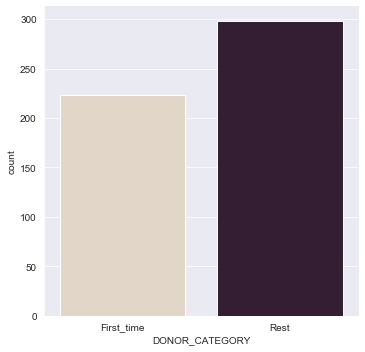

In [52]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=First_time_with_sampled)

### Input 
The input to the model is the array of Feature columns listed in the previous cell
### Target Variable 
The target variable is the Donor category

In [53]:
p=First_time_with_sampled[feature_cols]
q=First_time_with_sampled['DONOR_CATEGORY']

In [54]:
p_train,p_test,q_train,q_test = train_test_split(p, q, test_size=0.3, random_state=1)

### Importing the Decision Tree Classifier

In [55]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(p_train,q_train)
q_pred = clf.predict(p_test)

### Accuracy Metrics

In [56]:
print("Accuracy:",metrics.accuracy_score(q_test, q_pred))

Accuracy: 0.910828025477707


### Visualizing the Decision tree using graphviz

C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


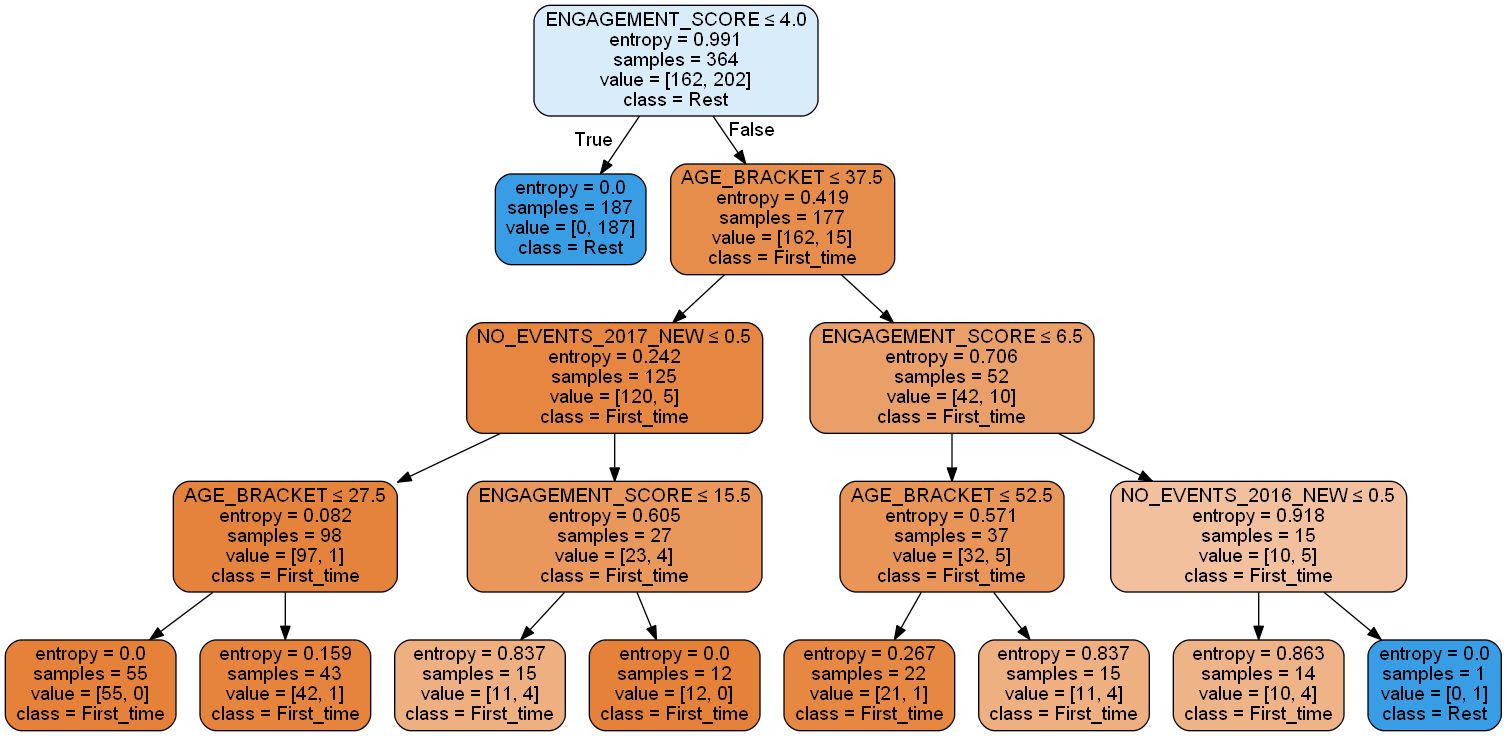

In [57]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['First_time','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy.png')
Image(graph.create_png())

In [58]:
def create_feat_importance_dataframe(model, p_train):
    'Returns dataframe with feature importances.'
    return pd.DataFrame(model.feature_importances_, p_train.columns, columns=['Importance'])

In [59]:
feat_imp_df = create_feat_importance_dataframe(clf, p_train)
print('Top Important Features:\n\n',
      feat_imp_df.sort_values(by='Importance', ascending=False).head(10), '\n')

Top Important Features:

                               Importance
ENGAGEMENT_SCORE                0.940173
AGE_BRACKET                     0.035424
NO_EVENTS_2017_NEW              0.018965
NO_EVENTS_2016_NEW              0.005438
STUDENT_ACTIVITY_PARTICIPANT    0.000000
NO_EVENTS_2018_NEW              0.000000 



### Reclassification - Based on Last given Amount

In [60]:
Philantrophy_data['LAST_GIFT_DATE']=Philantrophy_data['LAST_GIFT_DATE'].apply(lambda x:str(x))

In [61]:
Philantrophy_data['LAST_GIFT_DATE'].dropna()

0        23-08-2018
1        10-10-2017
2        15-01-1992
3        28-01-1987
4        30-12-1994
            ...    
34333           nan
34334           nan
34335           nan
34336           nan
34337           nan
Name: LAST_GIFT_DATE, Length: 34338, dtype: object

In [62]:
Philantrophy_data['LAST_GIFT_DATE'].dropna().isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
34333    False
34334    False
34335    False
34336    False
34337    False
Name: LAST_GIFT_DATE, Length: 34338, dtype: bool

In [63]:
for i in range(len(Philantrophy_data['LAST_GIFT_DATE'])):    
    try:
        string=Philantrophy_data.loc[i,'LAST_GIFT_DATE']    
        string=(string[6]+string[7]+string[8]+string[9])
        Philantrophy_data.loc[i,'LAST_GIFT_DATE']=string
    except:
        continue
    

In [64]:
Philantrophy_data.iloc[1,20]

'Reacquired  '

In [65]:
Philantrophy_data.iloc[1,34]

'2017'

In [66]:
for i in range(len(Philantrophy_data)):
    if Philantrophy_data.iloc[i,34] == '2018':
        Philantrophy_data.iloc[i,20] = '1st Time    '
        
     
        

In [67]:
Philantrophy_data['DONOR_CATEGORY'].value_counts()

Non Donor       29848
Lapsed           2699
1st Time         1282
Loyal             293
Reacquired        216
Name: DONOR_CATEGORY, dtype: int64

In [68]:
First_time_donor_new=Philantrophy_data[Philantrophy_data["DONOR_CATEGORY"] == "1st Time    "]

In [69]:
Sampled_data_new=Philantrophy_data.sample(n=1200, random_state=1)

In [70]:
y_new=Sampled_data_new[Sampled_data_new['DONOR_CATEGORY'] != '1st Time    ']

In [71]:
First_time_with_sampled_new=pd.concat([First_time_donor_new,y_new])

In [72]:
First_time_with_sampled_new['DONOR_CATEGORY']=First_time_with_sampled_new['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== '1st Time    ') else 'Rest')
First_time_with_sampled_new['MARITAL_STATUS']=First_time_with_sampled_new['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

In [73]:
First_time_with_sampled_new['STUDENT_ACTIVITY_PARTICIPANT']=First_time_with_sampled_new['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
First_time_with_sampled_new['AGE_BRACKET'].fillna((First_time_with_sampled_new['AGE_BRACKET'].mean()),inplace=True)
First_time_with_sampled_new['ENGAGEMENT_SCORE'].fillna((First_time_with_sampled_new['ENGAGEMENT_SCORE'].mean()),inplace=True)




In [74]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

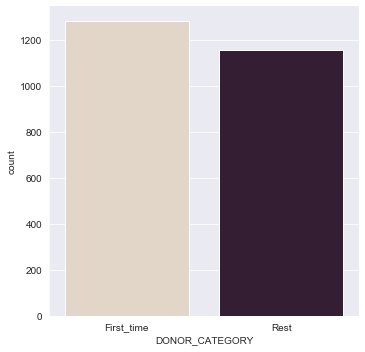

In [75]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=First_time_with_sampled_new)

In [76]:
p1=First_time_with_sampled_new[feature_cols]
q1=First_time_with_sampled_new['DONOR_CATEGORY']

In [77]:
p1_train,p1_test,q1_train,q1_test = train_test_split(p1, q1, test_size=0.3, random_state=1)

In [78]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=8)
clf1 = clf1.fit(p1_train,q1_train)
q1_pred = clf1.predict(p1_test)

In [79]:
print("Accuracy:",metrics.accuracy_score(q1_test, q1_pred))

Accuracy: 0.9658469945355191


In [80]:
len(q1_test)

732

In [81]:
len(q1_pred)

732

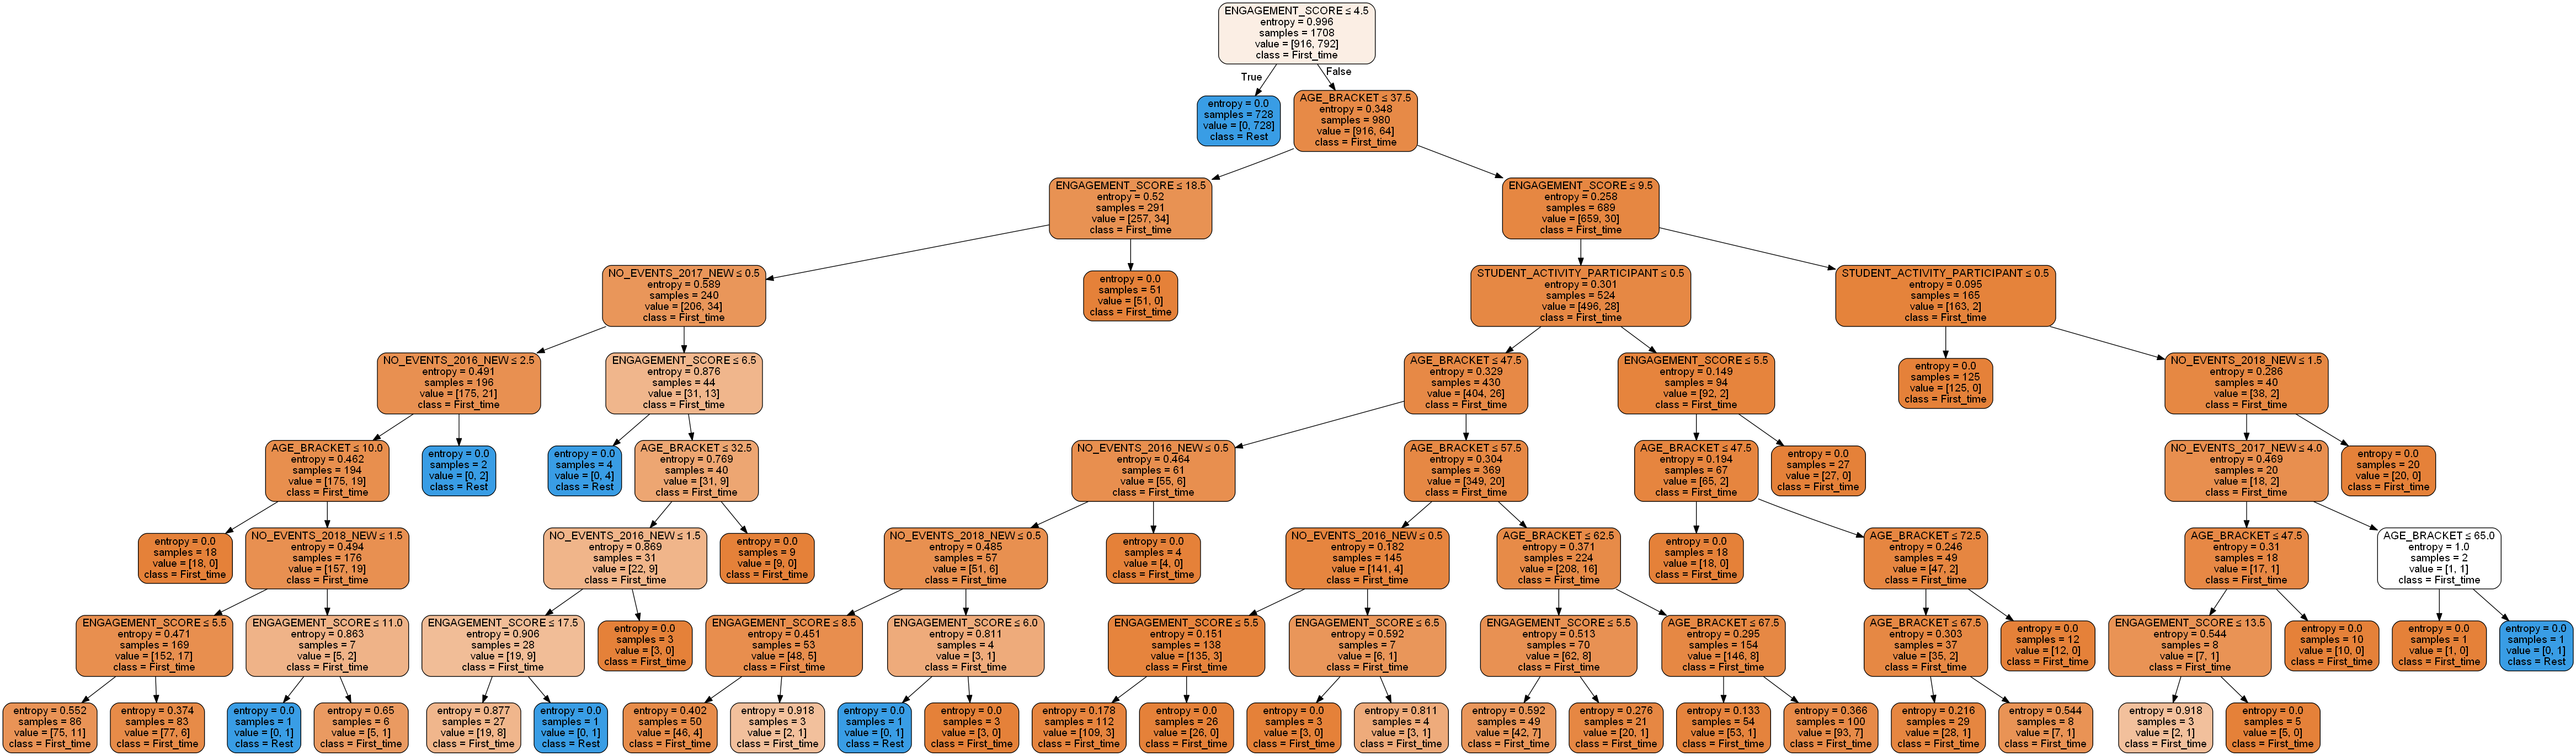

In [82]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['First_time','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy_new.png')
Image(graph.create_png())

## Reacquired Donors

In [83]:
Philantropy_new=pd.read_csv(r'F:\UB Philantrophy\Management_zipcode_1_use.csv')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
Philantropy_new.shape

(34338, 52)

In [85]:
Philantropy_new['DONOR_CATEGORY'].value_counts()

Non Donor       29868
Lapsed           2823
Loyal             920
Reacquired        504
1st Time          223
Name: DONOR_CATEGORY, dtype: int64

In [86]:
Reacquired=Philantropy_new[Philantropy_new['DONOR_CATEGORY']=='Reacquired  ']

In [87]:
Reacquired.shape

(504, 52)

In [88]:
Rest_without_reaquired=Philantropy_new.sample(n=500, random_state=1)

In [89]:
Reaquired_with_rest=pd.concat([Reacquired, Rest_without_reaquired])

In [90]:
Reaquired_with_rest.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
1,52671,N,S,M,60,NY,13027,N,BS,1981,...,0,0,0,0,0,0,0,0,0,0
14,164602,Y,M,M,55,NY,14139,N,PHD,2000,...,0,0,0,0,0,0,0,0,0,0
22,30385,N,S,M,60,TX,75126,N,BS,1986,...,0,0,0,1,0,0,0,0,0,0
30,45229,N,U,M,55,NY,10974,N,BS,1982,...,0,0,0,0,0,0,0,0,0,0
35,69649,N,M,M,55,NY,14224,N,MBA,1989,...,0,0,0,0,0,0,0,0,0,0


In [91]:
len(Reaquired_with_rest)

1004

In [92]:
Reaquired_with_rest['DONOR_CATEGORY']=Reaquired_with_rest['DONOR_CATEGORY'].apply(lambda x: 'First_time' if (x== 'Reacquired  ') else 'Rest')
Reaquired_with_rest['MARITAL_STATUS']=Reaquired_with_rest['MARITAL_STATUS'].apply(lambda x: 'S' if (x == 'U') else x)

In [93]:
Reaquired_with_rest['STUDENT_ACTIVITY_PARTICIPANT']=Reaquired_with_rest['STUDENT_ACTIVITY_PARTICIPANT'].apply(lambda x:1 if (x == 'Y') else 0)
Reaquired_with_rest['AGE_BRACKET'].fillna((Reaquired_with_rest['AGE_BRACKET'].mean()),inplace=True)
Reaquired_with_rest['ENGAGEMENT_SCORE'].fillna((Reaquired_with_rest['ENGAGEMENT_SCORE'].mean()),inplace=True)


In [94]:
feature_cols = ['AGE_BRACKET','STUDENT_ACTIVITY_PARTICIPANT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW']

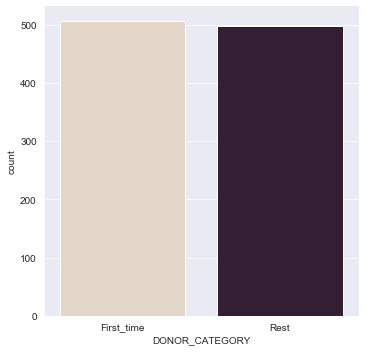

In [95]:
sns.catplot(x="DONOR_CATEGORY", kind="count", palette="ch:.25", data=Reaquired_with_rest)

In [96]:
p2=Reaquired_with_rest[feature_cols]
q2=Reaquired_with_rest['DONOR_CATEGORY']

In [97]:
Reaquired_with_rest.head()

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
1,52671,N,S,M,60,NY,13027,0,BS,1981,...,0,0,0,0,0,0,0,0,0,0
14,164602,Y,M,M,55,NY,14139,0,PHD,2000,...,0,0,0,0,0,0,0,0,0,0
22,30385,N,S,M,60,TX,75126,0,BS,1986,...,0,0,0,1,0,0,0,0,0,0
30,45229,N,S,M,55,NY,10974,0,BS,1982,...,0,0,0,0,0,0,0,0,0,0
35,69649,N,M,M,55,NY,14224,0,MBA,1989,...,0,0,0,0,0,0,0,0,0,0


In [98]:
p2_train,p2_test,q2_train,q2_test = train_test_split(p2, q2, test_size=0.3, random_state=1)

In [99]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf2 = clf2.fit(p2_train,q2_train)
q2_pred = clf2.predict(p2_test)

In [100]:
print("Accuracy:",metrics.accuracy_score(q2_test, q2_pred))

Accuracy: 0.9536423841059603


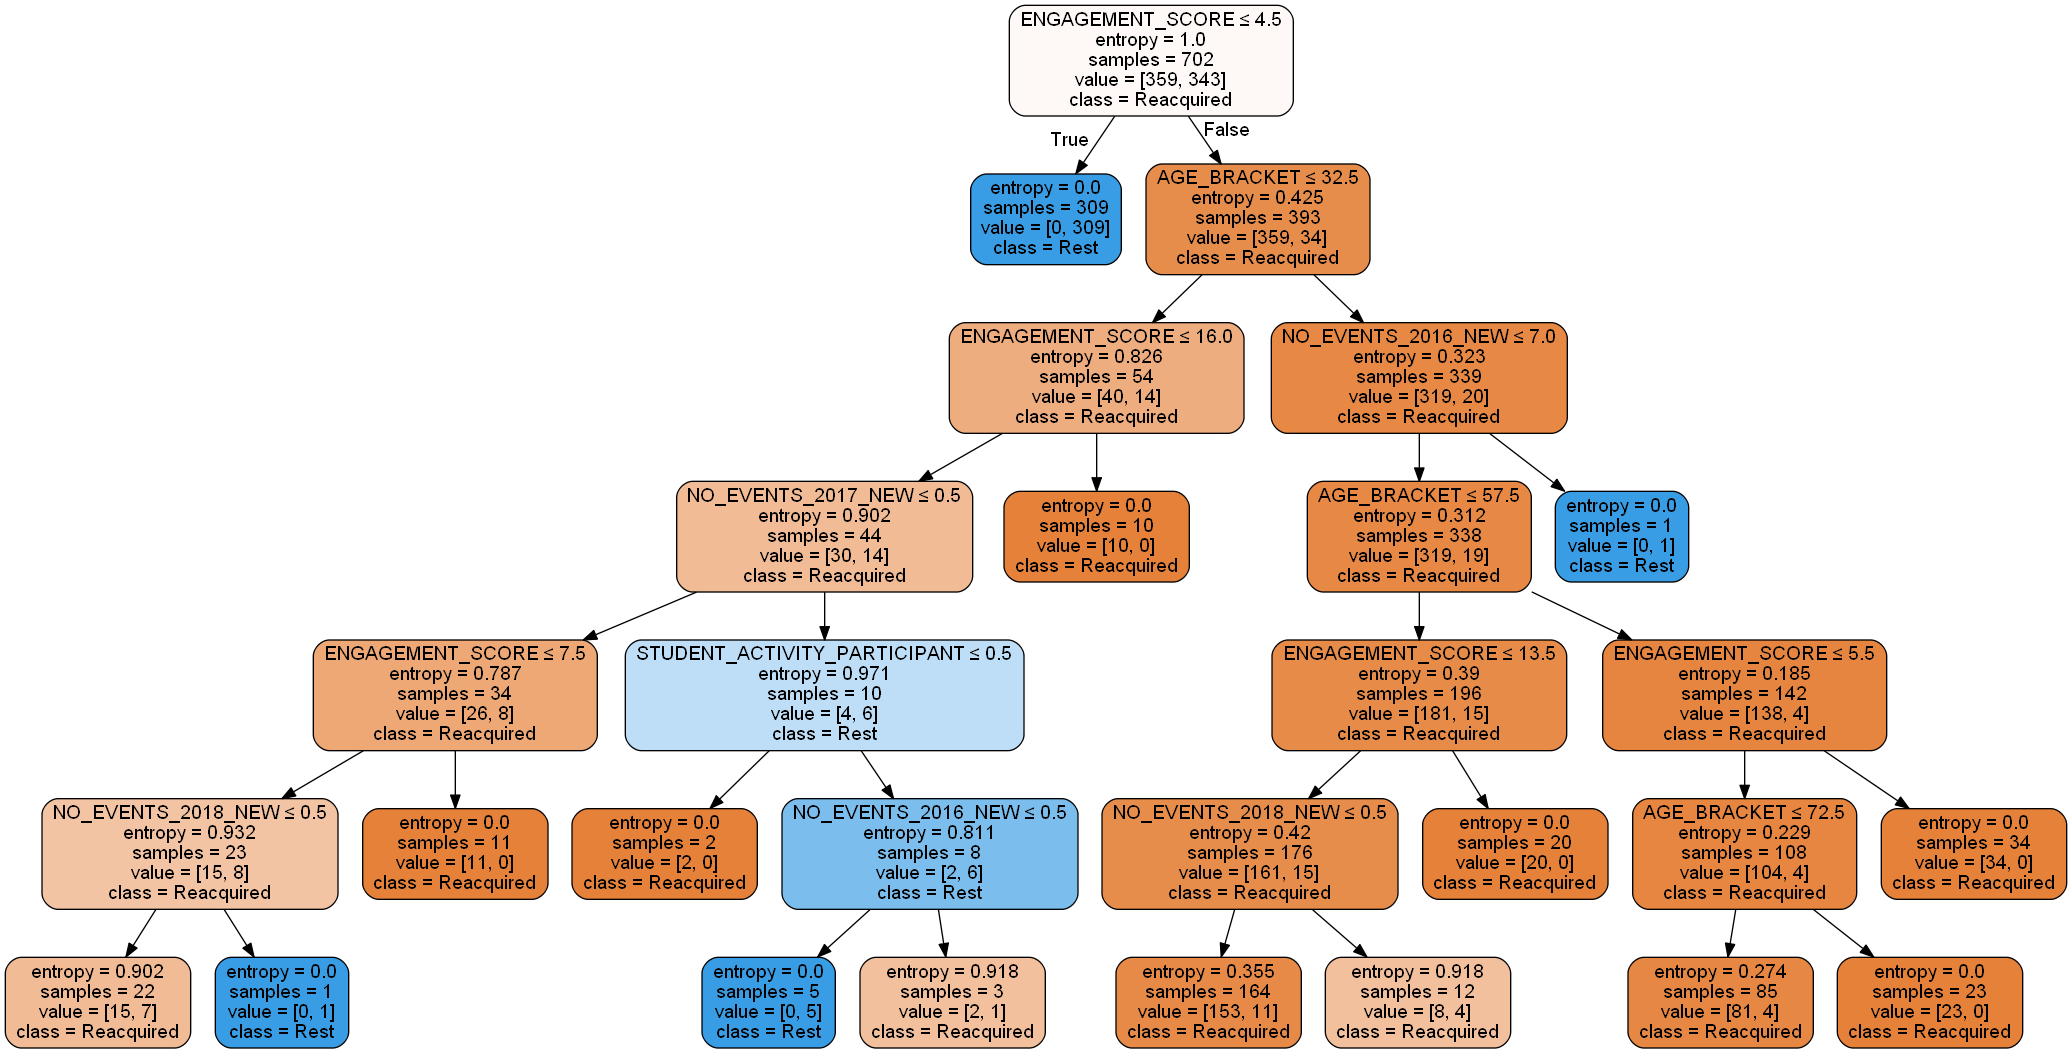

In [101]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Reacquired','Rest'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy_reaquired.png')
Image(graph.create_png())

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [103]:
cat_cols = ub_philantropy.select_dtypes(include=np.object).columns.tolist()

num_cols = ub_philantropy.select_dtypes(include=np.number).columns.tolist()

In [104]:
df = ub_philantropy.copy(deep=True)
df = df[num_cols]
X = df.drop(columns=['GIFT_AMOUNT_2018_NEW'])
y = df['GIFT_AMOUNT_2018_NEW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Saving id number for future use
train_id_number = X_train['ID_NUMBER']
test_id_number = X_test['ID_NUMBER']
X_train.drop(columns=['ID_NUMBER'], inplace=True)
X_test.drop(columns=['ID_NUMBER'], inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [105]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
def checkMAE(actual, pred, n):
    count = 0
    for i in range(len(actual)):
        if abs(actual[i] - pred[i]) > n:
            count +=1
    
    return count

mae_values = [10, 25, 50, 75, 100]

In [107]:
lr_train_pred = lr.predict(X_train)
print('\t\t\t\tLinear Regression with only numerical features\n')
print('Training data accuracy')
print('Length of Training Data: ', len(X_train))
print('MSE: ', mean_squared_error(y_train, lr_train_pred))
print('MAE: ', mean_absolute_error(y_train, lr_train_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_train.values.tolist(), lr_train_pred.tolist(), i),
     '(', '%.2f'%(checkMAE(y_train.values.tolist(), lr_train_pred.tolist(), i) / len(y_train) * 100), '%)')
#print('r^2: ', r2_score(y_train, lr_train_pred))
print('\n')
lr_test_pred = lr.predict(X_test)
print('Testing data accuracy')
print('Length of Testing Data: ', len(X_test))
print('MSE: ', mean_squared_error(y_test, lr_test_pred))
print('MAE: ', mean_absolute_error(y_test, lr_test_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_test.values.tolist(), lr_test_pred.tolist(), i),
     '(', '%.2f'%(checkMAE(y_test.values.tolist(), lr_test_pred.tolist(), i) / len(y_test) * 100), '%)')

#print('r^2: ', r2_score(y_test, lr_test_pred))

				Linear Regression with only numerical features

Training data accuracy
Length of Training Data:  27470
MSE:  490712.56336312345
MAE:  51.938117999989366
Number of predicted values with >  10  AE:  18695 ( 68.06 %)
Number of predicted values with >  25  AE:  8982 ( 32.70 %)
Number of predicted values with >  50  AE:  4645 ( 16.91 %)
Number of predicted values with >  75  AE:  3491 ( 12.71 %)
Number of predicted values with >  100  AE:  2606 ( 9.49 %)


Testing data accuracy
Length of Testing Data:  6868
MSE:  132852.56207421978
MAE:  55.730070508962264
Number of predicted values with >  10  AE:  4675 ( 68.07 %)
Number of predicted values with >  25  AE:  2197 ( 31.99 %)
Number of predicted values with >  50  AE:  1160 ( 16.89 %)
Number of predicted values with >  75  AE:  873 ( 12.71 %)
Number of predicted values with >  100  AE:  641 ( 9.33 %)


In [108]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [109]:
rf_train_pred = rf.predict(X_train)
print('\t\t\t\tRandom Forest Regressor with only numerical features\n')
print('Training data accuracy')
print('Length of Training Data: ', len(X_train))
print('MSE: ', mean_squared_error(y_train, rf_train_pred))
print('MAE: ', mean_absolute_error(y_train, rf_train_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, ' AE: ', checkMAE(y_train.values.tolist(), rf_train_pred.tolist(), i),
     '(', '%.2f' % (checkMAE(y_train.values.tolist(), rf_train_pred.tolist(), i) / len(y_train) * 100), '%)')
#print('r^2: ', r2_score(y_train, rf_train_pred))

print('\n')
rf_test_pred = rf.predict(X_test)
print('Testing data accuracy')
print('Length of Testing Data: ', len(X_test))
print('MSE: ', mean_squared_error(y_test, rf_test_pred))
print('MAE: ', mean_absolute_error(y_test, rf_test_pred))
for i in mae_values:
    print('Number of predicted values with > ', i, 'AE: ', checkMAE(y_test.values.tolist(), rf_test_pred.tolist(), i),
     '(', '%.2f' % (checkMAE(y_test.values.tolist(), rf_test_pred.tolist(), i) / len(y_test) * 100), '%)')
#print('r^2: ', r2_score(y_test, rf_test_pred))

				Random Forest Regressor with only numerical features

Training data accuracy
Length of Training Data:  27470
MSE:  127789.69663308308
MAE:  12.913017274485396
Number of predicted values with >  10  AE:  1746 ( 6.36 %)
Number of predicted values with >  25  AE:  1030 ( 3.75 %)
Number of predicted values with >  50  AE:  627 ( 2.28 %)
Number of predicted values with >  75  AE:  445 ( 1.62 %)
Number of predicted values with >  100  AE:  356 ( 1.30 %)


Testing data accuracy
Length of Testing Data:  6868
MSE:  535618.9234818802
MAE:  42.15990962243581
Number of predicted values with >  10 AE:  586 ( 8.53 %)
Number of predicted values with >  25 AE:  450 ( 6.55 %)
Number of predicted values with >  50 AE:  310 ( 4.51 %)
Number of predicted values with >  75 AE:  241 ( 3.51 %)
Number of predicted values with >  100 AE:  194 ( 2.82 %)


In [110]:
from sklearn.tree.export import export_text
r = export_text(clf2, feature_cols,
                decimals=0, show_weights=True)
print(r)

|--- ENGAGEMENT_SCORE <= 4
|   |--- weights: [0, 309] class: Rest
|--- ENGAGEMENT_SCORE >  4
|   |--- AGE_BRACKET <= 32
|   |   |--- ENGAGEMENT_SCORE <= 16
|   |   |   |--- NO_EVENTS_2017_NEW <= 0
|   |   |   |   |--- ENGAGEMENT_SCORE <= 8
|   |   |   |   |   |--- NO_EVENTS_2018_NEW <= 0
|   |   |   |   |   |   |--- weights: [15, 7] class: First_time
|   |   |   |   |   |--- NO_EVENTS_2018_NEW >  0
|   |   |   |   |   |   |--- weights: [0, 1] class: Rest
|   |   |   |   |--- ENGAGEMENT_SCORE >  8
|   |   |   |   |   |--- weights: [11, 0] class: First_time
|   |   |   |--- NO_EVENTS_2017_NEW >  0
|   |   |   |   |--- STUDENT_ACTIVITY_PARTICIPANT <= 0
|   |   |   |   |   |--- weights: [2, 0] class: First_time
|   |   |   |   |--- STUDENT_ACTIVITY_PARTICIPANT >  0
|   |   |   |   |   |--- NO_EVENTS_2016_NEW <= 0
|   |   |   |   |   |   |--- weights: [0, 5] class: Rest
|   |   |   |   |   |--- NO_EVENTS_2016_NEW >  0
|   |   |   |   |   |   |--- weights: [2, 1] class: First_time
|   |   |-

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
